# **Taller 04: Mínimos cuadrados**
### **Nombre: Joseph Jimenez** 
A)  Interpole los puntos:

In [12]:
p1 = (5.4, 3.2)
p2_i = (9.5, 0.7)
p3 = (12.3, -3.6)

De estos, el punto p2i debe ser seleccionable y movible. Cree un programa que interpole una parábola en tiempo real para los tres puntos. 

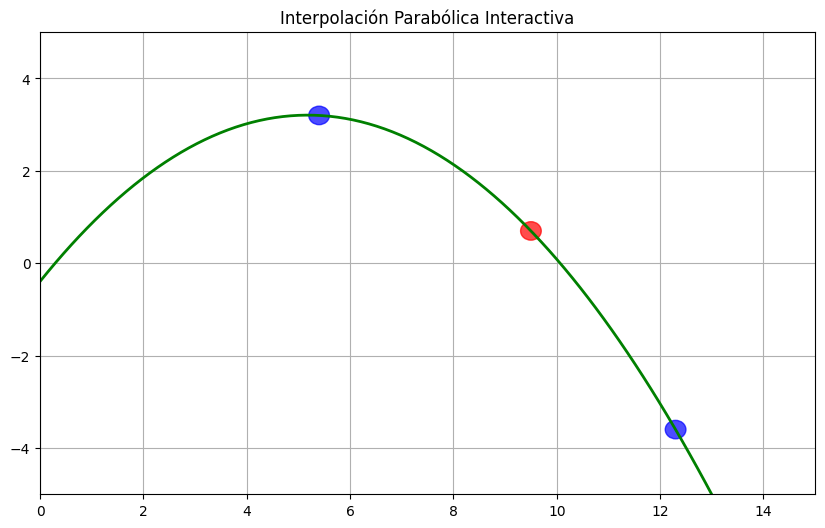

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

class InteractiveParabola:
    def __init__(self):
        # Puntos iniciales
        self.points = {
            'p1': np.array([5.4, 3.2]),
            'p2': np.array([9.5, 0.7]),
            'p3': np.array([12.3, -3.6])
        }
        
        # Configuración de la figura
        self.fig, self.ax = plt.subplots(figsize=(10, 6))
        self.ax.set_xlim(0, 15)
        self.ax.set_ylim(-5, 5)
        self.ax.grid(True)
        self.ax.set_title('Interpolación Parabólica Interactiva')
        
        # Dibujar los puntos iniciales
        self.point_plots = {}
        for name, point in self.points.items():
            self.point_plots[name] = Circle((point[0], point[1]), 0.2, color='red' if name == 'p2' else 'blue', alpha=0.7)
            self.ax.add_patch(self.point_plots[name])
        
        # Calcular y dibujar la parábola inicial
        self.calculate_parabola()
        self.parabola_line, = self.ax.plot([], [], 'g-', linewidth=2)
        self.update_plot()
        
        # Conectar eventos
        self.fig.canvas.mpl_connect('button_press_event', self.on_click)
        self.fig.canvas.mpl_connect('motion_notify_event', self.on_motion)
        self.fig.canvas.mpl_connect('button_release_event', self.on_release)
        
        self.selected_point = None
    
    def calculate_parabola(self):
        """Calcula los coeficientes de la parábola que pasa por los 3 puntos"""
        x = np.array([self.points['p1'][0], self.points['p2'][0], self.points['p3'][0]])
        y = np.array([self.points['p1'][1], self.points['p2'][1], self.points['p3'][1]])
        
        # Resolver el sistema de ecuaciones para a, b, c en y = ax² + bx + c
        A = np.vstack([x**2, x, np.ones_like(x)]).T
        self.coeffs = np.linalg.solve(A, y)
    
    def parabola(self, x):
        """Evalúa la parábola en los puntos x"""
        return self.coeffs[0]*x**2 + self.coeffs[1]*x + self.coeffs[2]
    
    def update_plot(self):
        """Actualiza la gráfica con los puntos y la parábola actual"""
        # Actualizar posición de los puntos
        for name, point in self.points.items():
            self.point_plots[name].center = (point[0], point[1])
        
        # Calcular y dibujar la parábola
        x_vals = np.linspace(0, 15, 100)
        y_vals = self.parabola(x_vals)
        self.parabola_line.set_data(x_vals, y_vals)
        
        self.fig.canvas.draw()
    
    def on_click(self, event):
        """Maneja el evento de click del mouse"""
        if event.inaxes != self.ax:
            return
        
        # Verificar si se hizo click cerca de p2
        click_point = np.array([event.xdata, event.ydata])
        distance_to_p2 = np.linalg.norm(click_point - self.points['p2'])
        
        if distance_to_p2 < 0.3:  # Radio de selección
            self.selected_point = 'p2'
    
    def on_motion(self, event):
        """Maneja el movimiento del mouse para arrastrar el punto"""
        if self.selected_point is None or event.inaxes != self.ax:
            return
        
        # Actualizar posición del punto seleccionado
        self.points[self.selected_point] = np.array([event.xdata, event.ydata])
        
        # Recalcular la parábola y actualizar la gráfica
        self.calculate_parabola()
        self.update_plot()
    
    def on_release(self, event):
        """Maneja la liberación del click del mouse"""
        self.selected_point = None

# Crear y mostrar la interfaz interactiva
interactive_plot = InteractiveParabola()
plt.show()

**B) Interpole el siguiente conjunto de datos:**

In [ ]:
xs = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

Parámetros óptimos: a = 0.4252, b = 1.5640, c = 0.2918
Coeficiente de determinación R²: 0.9888


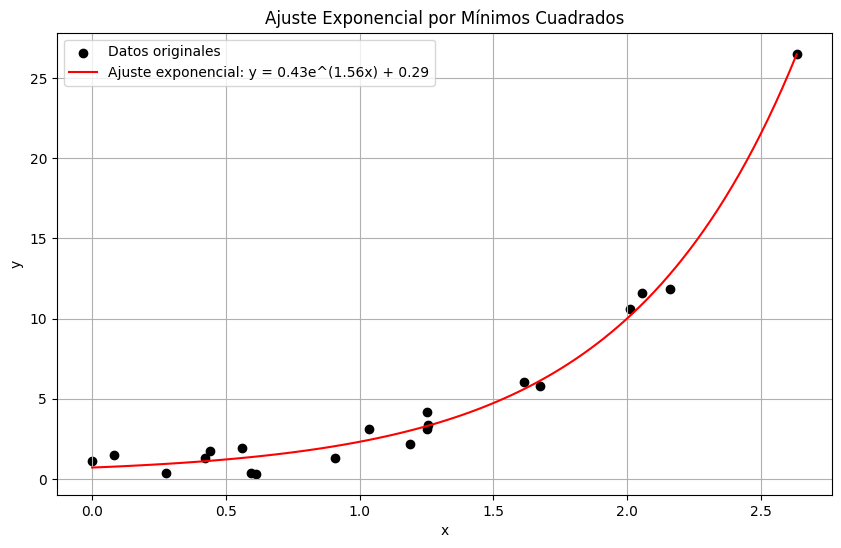

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Datos
xs = np.array([0.0003, 0.0822, 0.2770, 0.4212, 0.4403, 0.5588, 0.5943, 0.6134, 
               0.9070, 1.0367, 1.1903, 1.2511, 1.2519, 1.2576, 1.6165, 1.6761, 
               2.0114, 2.0557, 2.1610, 2.6344])
ys = np.array([1.1017, 1.5021, 0.3844, 1.3251, 1.7206, 1.9453, 0.3894, 0.3328, 
               1.2887, 3.1239, 2.1778, 3.1078, 4.1856, 3.3640, 6.0330, 5.8088, 
               10.5890, 11.5865, 11.8221, 26.5077])

# Función exponencial
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Función de error a minimizar (suma de cuadrados)
def error_function(params):
    a, b, c = params
    y_pred = exponential_func(xs, a, b, c)
    return np.sum((ys - y_pred)**2)

# Optimización usando el método de Nelder-Mead (derivada-free)
initial_guess = [1.0, 1.0, 1.0]  # Valores iniciales para a, b, c
result = minimize(error_function, initial_guess, method='Nelder-Mead')

# Parámetros óptimos
a_opt, b_opt, c_opt = result.x
print(f"Parámetros óptimos: a = {a_opt:.4f}, b = {b_opt:.4f}, c = {c_opt:.4f}")

# Calcular R²
y_pred = exponential_func(xs, a_opt, b_opt, c_opt)
ss_res = np.sum((ys - y_pred)**2)
ss_tot = np.sum((ys - np.mean(ys))**2)
r_squared = 1 - (ss_res / ss_tot)
print(f"Coeficiente de determinación R²: {r_squared:.4f}")

# Gráfico
x_fit = np.linspace(min(xs), max(xs), 100)
y_fit = exponential_func(x_fit, a_opt, b_opt, c_opt)

plt.figure(figsize=(10, 6))
plt.scatter(xs, ys, color='black', label='Datos originales')
plt.plot(x_fit, y_fit, 'r-', label=f'Ajuste exponencial: y = {a_opt:.2f}e^({b_opt:.2f}x) + {c_opt:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Exponencial por Mínimos Cuadrados')
plt.legend()
plt.grid(True)
plt.show()